# Glow-ViT results visualized

This is a script that's intended to visualize the performance of various Glow-ViT models evaluated on the low-light exposure datasets we currently have:

1. wildlife_very_dark_test
2. wildlife_grayscale
3. wildlife_less_saturated
4. wildlife_underexposed

## Results (Original dataset without filtering):

|model\eval_loss| original | very dark | illuminate | mixed | very dark test | grayscale | less saturated | underexposed |
|--|---------|------------|------------|-------|----------------|-----------|----------------|----|
|Glow-ViT|0.1246|4.5018|0.0225|0.5657|4.3495|0.2021|0.176|0.351|
|Glow-ViT-Dark|0.2078|0.5554|0.1712|0.2502|0.4528|0.2992 |0.3231      |0.2702|
|Glow-ViT-Illuminate|0.1177|2.1939|0.1064|0.4042|2.2027|0.3929     |0.4334          |0.5756|
|Glow-ViT-Mix|0.0744|0.3715|0.0243|0.1449|0.1396       | 0.0776   | 0.0707 |0.0472|


### Evaluation speed

|model\eval_samples_per_second| original | very dark | illuminate | mixed | very dark test | grayscale | less saturated | underexposed |
|--|---------|------------|------------|-------|----------------|-----------|----------------|----|
|Glow-ViT|13.22|13.087|13.589|12.81|21.118|13.231|20.086|20.162|
|Glow-ViT-Dark|13.027|13.189|13.249|12.587|19.035|12.997                |21.418|21.862|
|Glow-ViT-Illuminate|12.809|12.857|13.223|11.938|19.711             |12.803            |19.972|20.094|
|Glow-ViT-Mix|14.038|13.294 |13.956|12.778|21.091       | 13.254   | 21.135 |20.766|

In [1]:
import matplotlib.pyplot as plt
import numpy as np

datasets = ["original", "very_dark", "illuminate", "mixed", "very_dark_test", "grayscale", "less_saturated", "underexposed"]
models = ["Glow-ViT", "Glow-ViT-dark", "Glow-ViT-illuminate", "Glow-ViT-mix"]
eval_loss = {
    "Glow-ViT": [0.1246, 4.5018, 0.0225, 0.5657, 4.3495, 0.2021, 0.176, 0.351],
    "Glow-ViT-dark": [0.2078, 0.5554, 0.1712, 0.2502, 0.4528, 0.2992, 0.3231, 0.2702],
    "Glow-ViT-illuminate": [0.1177, 2.1939, 0.1064, 0.4042, 2.2027, 0.3929, 0.4334, 0.5756],
    "Glow-ViT-mix": [0.0744, 0.3715, 0.0243, 0.1449, 0.1396, 0.0776, 0.0707, 0.0472]
}
eval_samples_per_second = {
    "Glow-ViT": [13.22, 13.087, 13.589, 12.81, 21.118, 13.231, 20.086, 20.162],
    "Glow-ViT-dark": [13.027, 13.189, 13.249, 12.587, 19.035, 12.997, 21.418, 21.862],
    "Glow-ViT-illuminate": [12.809, 12.857, 13.223, 11.938, 19.711, 12.803, 19.972, 20.094],
    "Glow-ViT-mix": [14.038, 13.294 , 13.956, 12.778, 21.091, 13.254, 21.135, 20.766]
}

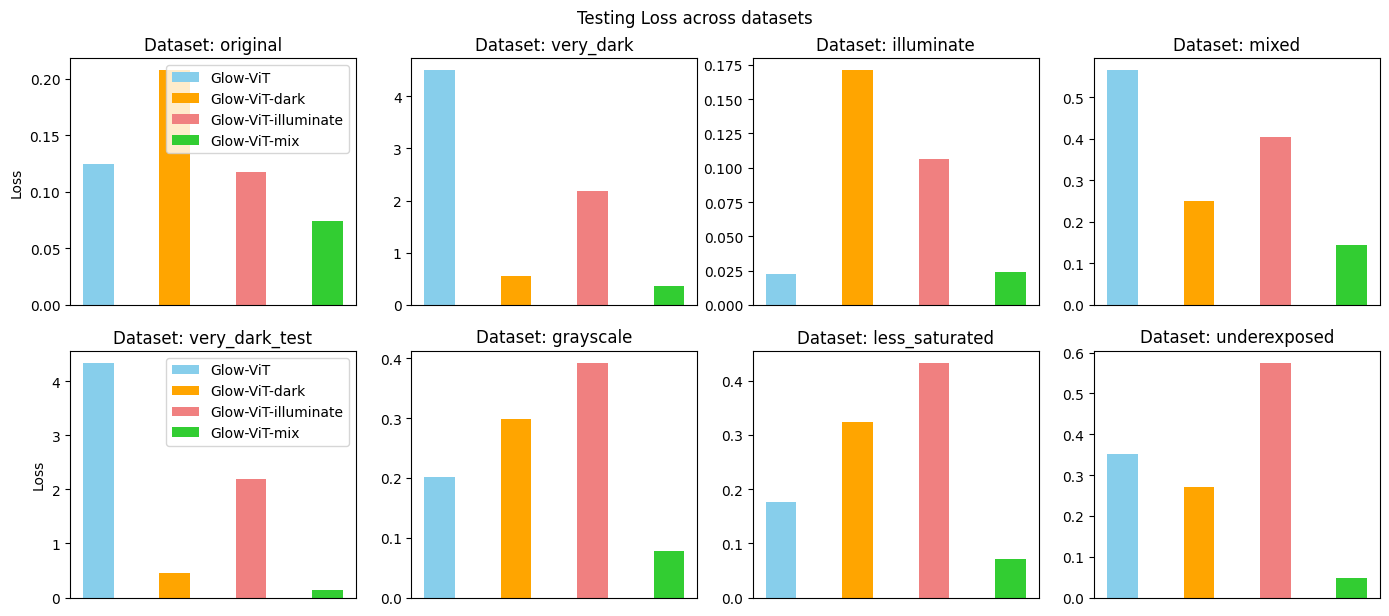

In [2]:

x = np.arange(len(models))
width = 0.4  # the width of the bars
colors = ["skyblue", "orange", "lightcoral", "limegreen"]

fig, axes = plt.subplots(2, 4, figsize=(14, 6), sharex=True)
axes = axes.flatten()

for i, dataset in enumerate(datasets):
    ax = axes[i]
    for j, model in enumerate(models):
        ax.bar(x[j], eval_loss[model][i], width, label=model, color=colors[j])

    # Titles and labels
    ax.set_title(f"Dataset: {dataset}")
    ax.set_xticks([])
    # ax.set_xticklabels(models)
    if i % 4 == 0:
        ax.set_ylabel("Loss")
        ax.legend()

# General layout adjustments
plt.tight_layout()
plt.suptitle("Testing Loss across datasets", fontsize=12, y=1.02)
plt.show()


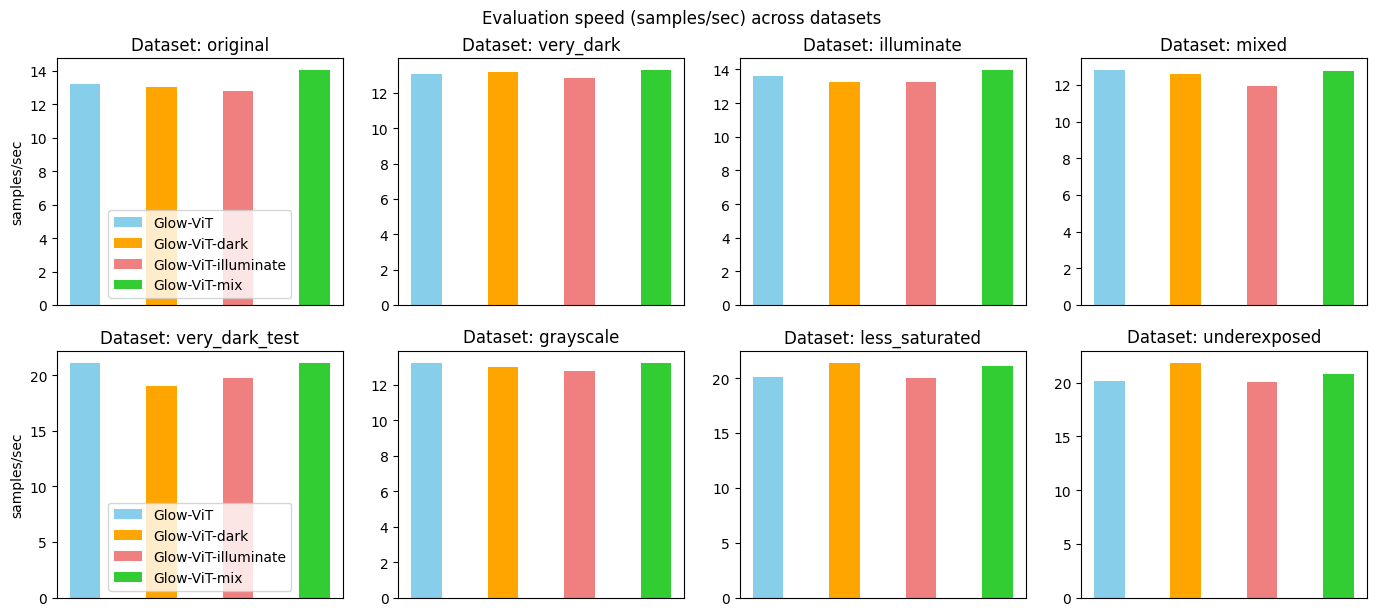

In [3]:

x = np.arange(len(models))
width = 0.4  # the width of the bars
colors = ["skyblue", "orange", "lightcoral", "limegreen"]

fig, axes = plt.subplots(2, 4, figsize=(14, 6), sharex=True)
axes = axes.flatten()

for i, dataset in enumerate(datasets):
    ax = axes[i]
    for j, model in enumerate(models):
        ax.bar(x[j], eval_samples_per_second[model][i], width, label=model, color=colors[j])

    # Titles and labels
    ax.set_title(f"Dataset: {dataset}")
    ax.set_xticks([])
    # ax.set_xticklabels(models)
    if i % 4 == 0:
        ax.set_ylabel("samples/sec")
        ax.legend(loc='lower center')

# General layout adjustments
plt.tight_layout()
plt.suptitle("Evaluation speed (samples/sec) across datasets", fontsize=12, y=1.02)
plt.show()


## Results (Dataset with filtering):

Below are the results of the following dataset 

1. wildlife_very_dark_test
2. wildlife_grayscale
3. wildlife_less_saturated
4. wildlife_underexposed

going through 3 different filters to process low-light images:

- Histogram Equalization (HE)
- CLAHE
- AFIFI

### wildlife_underexposed

| Model             | Dataset                              | Eval Loss | Eval Samples Per Second |
|--------------------|--------------------------------------|-----------|--------------------------|
| Glow-ViT          | wildlife_underexposed_clahe          | 0.0688    | 18.855                   |
| Glow-ViT          | wildlife_underexposed_he             | 0.1119    | 20.013                   |
| Glow-ViT          | wildlife_underexposed_afifi          | 0.0692    | 19.543                   |
| Glow-ViT-Dark     | wildlife_underexposed_clahe          | 0.2596    | 17.982                   |
| Glow-ViT-Dark     | wildlife_underexposed_he             | 0.2636    | 19.576                   |
| Glow-ViT-Dark     | wildlife_underexposed_afifi          | 0.2450    | 20.645                   |
| Glow-ViT-Illuminate | wildlife_underexposed_clahe        | 0.2424    | 18.255                   |
| Glow-ViT-Illuminate | wildlife_underexposed_he           | 0.2550    | 20.814                   |
| Glow-ViT-Illuminate | wildlife_underexposed_afifi        | 0.2446    | 20.759                   |
| Glow-ViT-Mix      | wildlife_underexposed_clahe          | 0.0577    | 19.283                   |
| Glow-ViT-Mix      | wildlife_underexposed_he             | 0.0917    | 20.847                   |
| Glow-ViT-Mix      | wildlife_underexposed_afifi          | 0.0610    | 20.104                   |

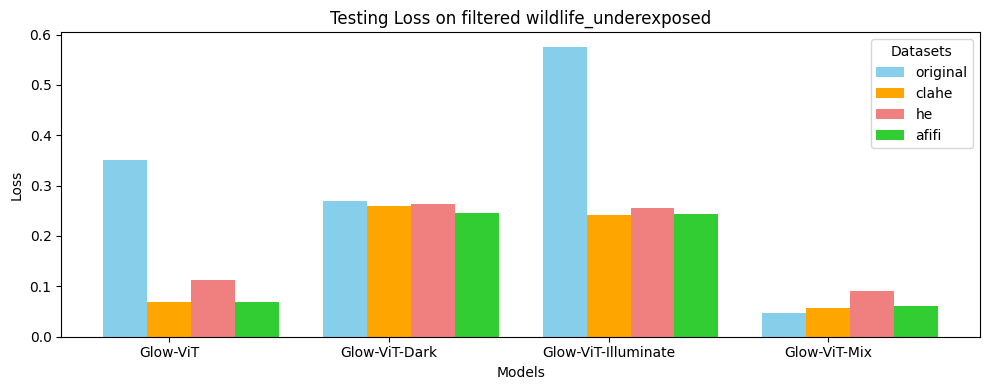

In [ ]:
 
models = ["Glow-ViT", "Glow-ViT-Dark", "Glow-ViT-Illuminate", "Glow-ViT-Mix"]
filters = ["original", "clahe", "he", "afifi"]
eval_loss = {
    "Glow-ViT": [0.351, 0.0688, 0.1119, 0.0692],
    "Glow-ViT-Dark": [0.2702, 0.2596, 0.2636, 0.245],
    "Glow-ViT-Illuminate": [0.5756, 0.2424, 0.255, 0.2446],
    "Glow-ViT-Mix": [0.047, 0.0577, 0.0917, 0.061],
}

x = np.arange(len(models))  # Positions for the models on x-axis
width = 0.2  # Width of each bar
colors = ["skyblue", "orange", "lightcoral", "limegreen"]  # One color per dataset

fig, ax = plt.subplots(figsize=(10, 4))

# Add bars for each dataset
for i, dataset in enumerate(filters):
    offset = (i - 1) * width  # Calculate the position offset for the group of bars
    ax.bar(x + offset, [eval_loss[model][i] for model in models], width, label=dataset, color=colors[i])

# Title, labels, and legend
ax.set_title("Testing Loss on filtered wildlife_underexposed")
ax.set_xlabel("Models")
ax.set_ylabel("Loss")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(title="filters")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()